# Test Neurons

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# %load_ext line_profiler

In [32]:
import os
import numpy as np
import torch
import pandas as pd

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

In [34]:
from EconDLSolvers import choose_gpu

In [35]:
from BufferStockModel import BufferStockModelClass

## 2. <a id='toc2_'></a>[Setup](#toc0_)

In [36]:
device = choose_gpu()

GPU 0: 41.70GB free
Best GPU: 0


In [37]:
algonames = ["DeepSimulate", "DeepFOC", "DeepVPD"]
# algonames = ["DeepVPD"]
NNeurons = [250, 750, 1250]
layers = [2,4,6]

# max time or max iteration
terminate = "iteration"  # "itertion" or "time"
maxtime = 0.3 #in minutes
maxiter = 2

In [38]:


results = []

for algo in algonames:
    print(f'Running algo {algo}')
    for NNeuron in NNeurons:
        print(f'Using {NNeuron} Neurons')      
        for layer in layers:
            print(f'Using {layer} layers')

            # Set neurons and layers
            neurons = np.array([NNeuron]*layer)

            # load model
            if terminate == "iteration":
                model = BufferStockModelClass(
                    algoname=algo,
                    device=device,
                    train={'K': maxiter, 'K_time': np.inf, 'Nneurons_policy': neurons, 'Nneurons_value': neurons,'epoch_policy_min':100,'Nepochs_policy':100,'epoch_value_min':100,'Nepochs_value':100,'start_train_policy':-1},
                    show_memory=False
                )
            elif terminate == "time":
                model = BufferStockModelClass(
                    algoname=algo,
                    device=device,
                    train={'K': np.inf, 'K_time': maxtime, 'Nneurons_policy': neurons, 'Nneurons_value': neurons,'epoch_policy_min':100,'Nepochs_policy':100,'epoch_value_min':100,'Nepochs_value':100,'start_train_policy':-1},
                    show_memory=False
                )

            # Solve the model
            model.solve()

            # gather results
            iteration = model.info['iter']
            elapsed_time = model.info['time']
            elapsed_time_iter1 = model.info[('update_time',0)]
            elapsed_time_iter2 = model.info[('update_time',1)]
            time_train_value = model.info['time.update_NN.train_value']
            time_train_policy = model.info['time.update_NN.train_policy']
            time_sim_R = model.info['time.simulate_R']
            R = model.info['R']
            Nparams = sum([np.prod(v.size()) for v in model.policy_NN.parameters()])

            results.append({
                'Algorithm': algo,
                'NNeurons': NNeuron,
                'Layers': layer,
                'Nparams': Nparams,
                'Iterations': iteration,
                'Total Time': elapsed_time,
                'Time spent on 1. iter': elapsed_time_iter1,
                'Time spent on 2. iter': elapsed_time_iter2,
            })

# Convert results to a DataFrame
df = pd.DataFrame(results)

df

Running algo DeepSimulate
Using 250 Neurons
Using 2 layers
Terminating after 2 iter, max number of iterations reached
Using 4 layers
Terminating after 2 iter, max number of iterations reached
Using 6 layers
Terminating after 2 iter, max number of iterations reached
Using 750 Neurons
Using 2 layers
Terminating after 2 iter, max number of iterations reached
Using 4 layers
Terminating after 2 iter, max number of iterations reached
Using 6 layers
Terminating after 2 iter, max number of iterations reached
Using 1250 Neurons
Using 2 layers
Terminating after 2 iter, max number of iterations reached
Using 4 layers
Terminating after 2 iter, max number of iterations reached
Using 6 layers
Terminating after 2 iter, max number of iterations reached
Running algo DeepFOC
Using 250 Neurons
Using 2 layers
Terminating after 2 iter, max number of iterations reached
Using 4 layers
Terminating after 2 iter, max number of iterations reached
Using 6 layers
Terminating after 2 iter, max number of iterations 

,Algorithm,NNeurons,Layers,Nparams,Iterations,Total Time,Time spent on 1. iter,Time spent on 2. iter
0,DeepSimulate,250,2,77501,2,3.033344,0.228786,0.139716
1,DeepSimulate,250,4,203001,2,5.203465,0.239332,0.236753
2,DeepSimulate,250,6,328501,2,7.223783,0.300002,0.226340
3,DeepSimulate,750,2,607501,2,6.689853,0.240616,0.153333
4,DeepSimulate,750,4,1734001,2,30.374863,0.301140,0.231673
5,DeepSimulate,750,6,2860501,2,49.005241,0.406817,0.300409
6,DeepSimulate,1250,2,1637501,2,14.594303,0.300883,0.184241
7,DeepSimulate,1250,4,4765001,2,37.640154,0.398689,0.364832
8,DeepSimulate,1250,6,7892501,2,109.258662,0.591257,0.504685
9,DeepFOC,250,2,77501,2,4.318514,0.896579,0.772792


In [41]:
df

,Algorithm,NNeurons,Layers,Nparams,Iterations,Total Time,Time spent on 1. iter,Time spent on 2. iter,Time per Iter
0,DeepSimulate,250,2,77501,2,3.033344,0.228786,0.139716,1.516672
1,DeepSimulate,250,4,203001,2,5.203465,0.239332,0.236753,2.601732
2,DeepSimulate,250,6,328501,2,7.223783,0.300002,0.226340,3.611891
3,DeepSimulate,750,2,607501,2,6.689853,0.240616,0.153333,3.344926
4,DeepSimulate,750,4,1734001,2,30.374863,0.301140,0.231673,15.187431
5,DeepSimulate,750,6,2860501,2,49.005241,0.406817,0.300409,24.502621
6,DeepSimulate,1250,2,1637501,2,14.594303,0.300883,0.184241,7.297151
7,DeepSimulate,1250,4,4765001,2,37.640154,0.398689,0.364832,18.820077
8,DeepSimulate,1250,6,7892501,2,109.258662,0.591257,0.504685,54.629331
9,DeepFOC,250,2,77501,2,4.318514,0.896579,0.772792,2.159257


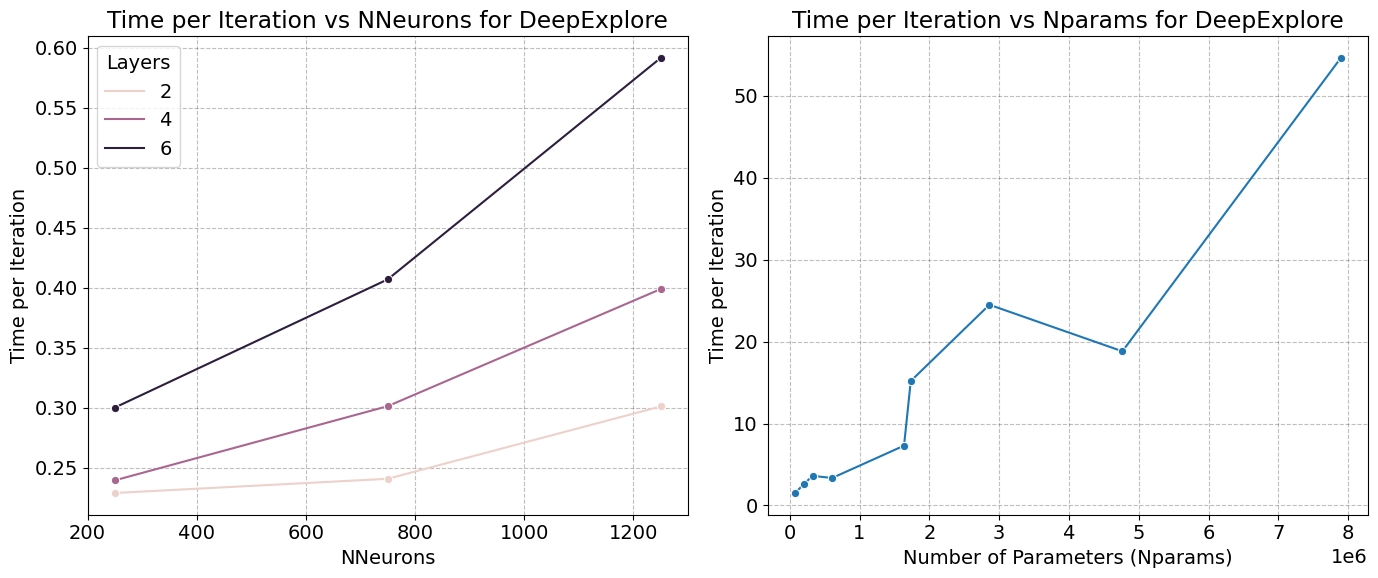

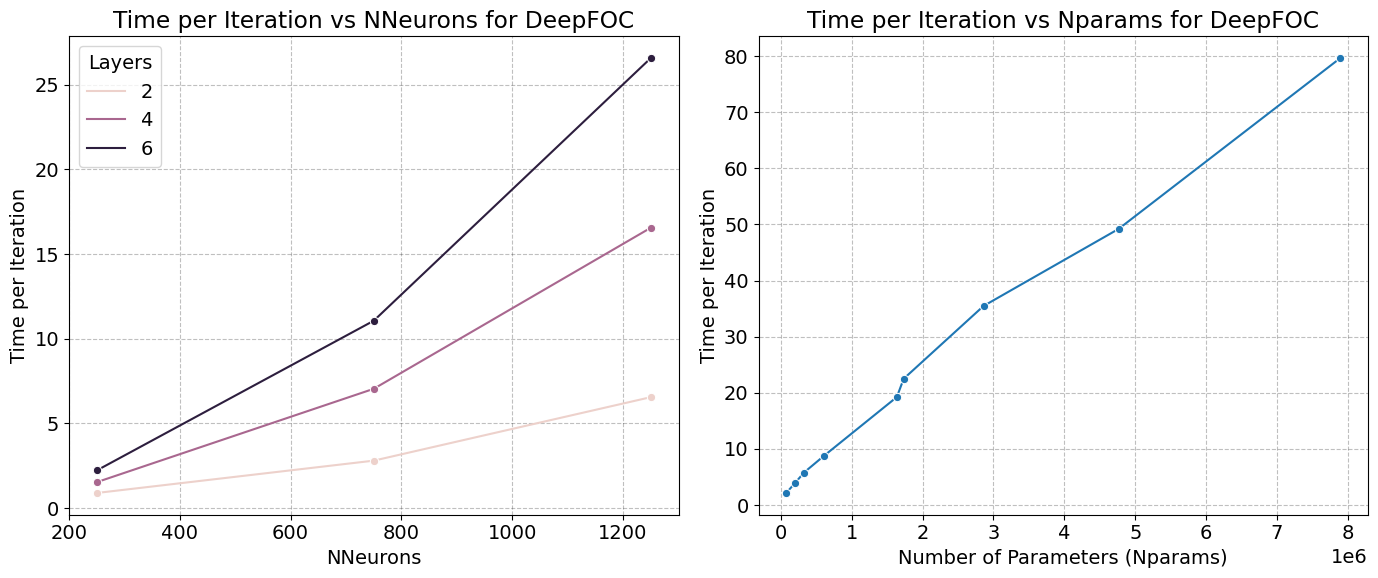

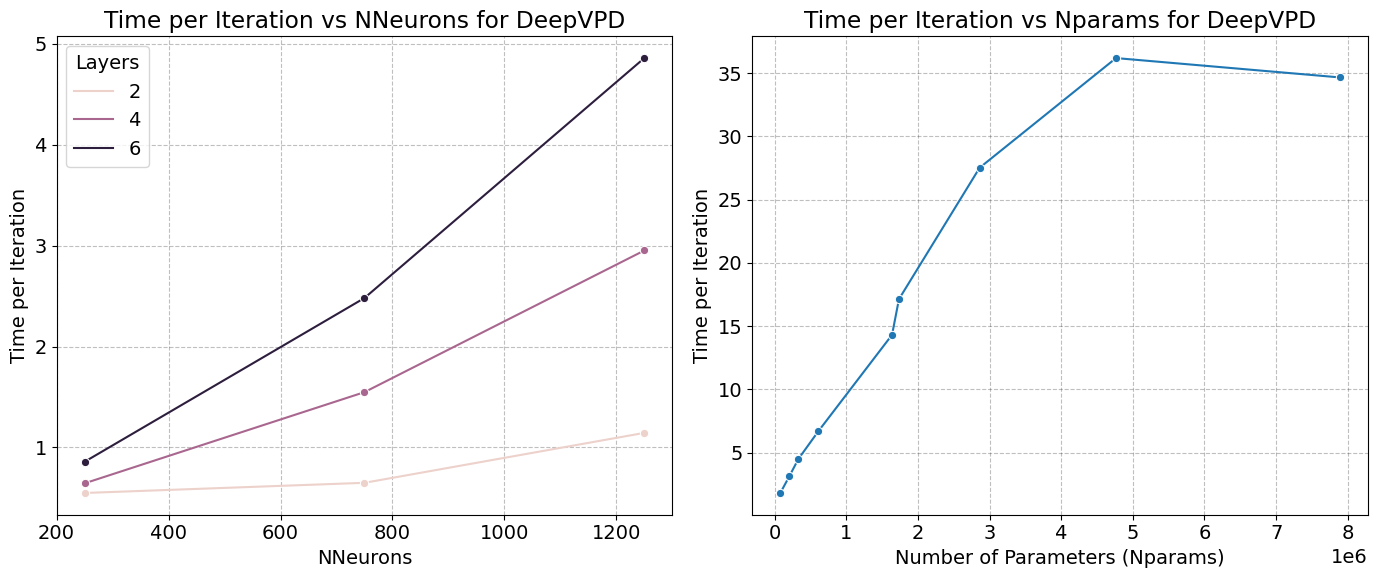

In [42]:
# Get time per iteration
# df["Time per Iter"] = df["Total Time"] / df["Iterations"]

for algo in algonames:
    # Get data
    subset = df[df["Algorithm"] == algo]

    # Create figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Time per Iteration vs NNeurons for each number of layers
    sns.lineplot(
        data=subset, 
        x="NNeurons", 
        y="Time spent on 1. iter", 
        hue="Layers", 
        marker="o",
        ax=axes[0]
    )
    axes[0].set_title(f"Time per Iteration vs NNeurons for {algo}")
    axes[0].set_xlabel("NNeurons")
    axes[0].set_ylabel("Time per Iteration")
    axes[0].legend(title="Layers")
    axes[0].grid(True)

    # Plot Time per Iteration vs Nparams
    sns.lineplot(
        data=subset, 
        x="Nparams", 
        y="Time spent on 1. iter", 
        marker="o",
        ax=axes[1]
    )
    axes[1].set_title(f"Time per Iteration vs Nparams for {algo}")
    axes[1].set_xlabel("Number of Parameters (Nparams)")
    axes[1].set_ylabel("Time per Iteration")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
